---
title: Visualization I
---

::: {note} Learning Outcomes
- Understand the theories behind effective visualizations and start to generate plots of our own with `matplotlib` and `seaborn`.
- Analyze histograms and identify the skewness, potential outliers, and the mode.
- Use `boxplot` and `violinplot` to compare two distributions.
:::

In our journey of the data science lifecycle, we have begun to explore the vast world of exploratory data analysis. More recently, we learned how to pre-process data using various data manipulation techniques. As we work towards understanding our data, there is one key component missing in our arsenal — the ability to visualize and discern relationships in existing data.

These next two lectures will introduce you to various examples of data visualizations and their underlying theory. In doing so, we'll motivate their importance in real-world examples with the use of plotting libraries.

## Visualizations in Data 8 and Data 100 (so far)

You've likely encountered several forms of data visualizations in your studies. You may remember some examples from Data 8: line plots, scatter plots, and histograms. Each of these served a unique purpose. For example, line plots displayed how numerical quantities changed over time, while histograms were useful in understanding a variable's distribution. 

**Line Chart:**
```{image} images/line_chart_viz.png
:alt: Example of a line chart
:width: 300
```

**Scatterplot:**
```{image} images/scatter.png
:alt: Example of a scatterplot
:width: 300
```

**Histogram:** 
```{image} images/histogram_viz.png
:alt: Example of a histogram
:width: 400
```

## Goals of Visualization

Visualizations are useful for a number of reasons. In Data 100, we consider two areas in particular:

1. To broaden your understanding of the data. Summarizing trends visually before in-depth analysis is a key part of exploratory data analysis. Creating these graphs is a lightweight, iterative and flexible process that helps us investigate relationships between variables.
2. To communicate results/conclusions to others. These visualizations are highly editorial, selective, and fine-tuned to achieve a communications goal, so be thoughtful and careful about its clarity, accessibility, and necessary context.

Altogether, these goals emphasize the fact that visualizations aren't a matter of making "pretty" pictures; we need to do a lot of thinking about what stylistic choices communicate ideas most effectively.

This course note will focus on the first half of visualization topics in Data 100. The goal here is to understand how to choose the "right" plot depending on different variable types and, secondly, how to generate these plots using code.

## An Overview of Distributions

A distribution describes both the set of values that a single variable can take and the frequency of unique values in a single variable. For example, if we're interested in the distribution of students across Data 100 discussion sections, the set of possible values is a list of discussion sections (10-11am, 11-12pm, etc.), and the frequency that each of those values occur is the number of students enrolled in each section. In other words, we're interested in how a variable is distributed across its possible values. Therefore, distributions must satisfy two properties:

   1. The total frequency of all categories must sum to 100%
   2. Total count should sum to the total number of datapoints if we're using raw counts.
   
**Not a Valid Distribution:**
```{image} images\example_on_an_invalid_distribution.png
:alt: Example of a non-valid distribution
:width: 350
```

This is not a valid distribution since individuals can be associated with more than one category.


**Valid Distribution:**
```{image} images/good_distro.png
:alt: Example of a good distribution where the sum of categories totals 100.
:width: 350
```

This example satisfies the two properties of distributions, so it is a valid distribution. 

## Variable Types Should Inform Plot Choice

Different plots are more or less suited for displaying particular types of variables, laid out in the diagram below:

```{image} images/variables.png
:alt: Variables can either be qualitative or quantitative. If a variable is qualitative, it can be either ordinal or nominal
:width: 500
```

The first step of any visualization is to identify the type(s) of variables we're working with. From here, we can select an appropriate plot type: 

## Qualitative Variables: Bar Plots

A **bar plot** is one of the most common ways of displaying the **distribution** of a **qualitative** (categorical) variable. The length of a bar plot encodes the frequency of a category; the width encodes no useful information. The color *could* indicate a sub-category, but this is not necessarily the case. 

Before we begin, it’s helpful to look at some best practices for bar charts.
- Always make sure your bar chart answers a relevant question about the data.
- Use color sparingly if the data has natural groups. (e.g., counties into states, etc.)
- Sort by count (high to low) or by grouping of the data, or both: avoid sorting alphabetically.

Let's contextualize this in an example. We will use the World Bank dataset (`wb`) in our analysis.

````{dropdown} Click to see the code
:open: false
```
import pandas as pd
import numpy as np
import warnings 

warnings.filterwarnings("ignore", "use_inf_as_na") # Supresses distracting deprecation warnings

wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb.head()
```
````

In [1]:
import pandas as pd
import numpy as np
import warnings 

warnings.filterwarnings("ignore", "use_inf_as_na") # Supresses distracting deprecation warnings

wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


We can visualize the distribution of the `Continent` column using a bar plot. There are a few ways to do this.

### Plotting in Pandas

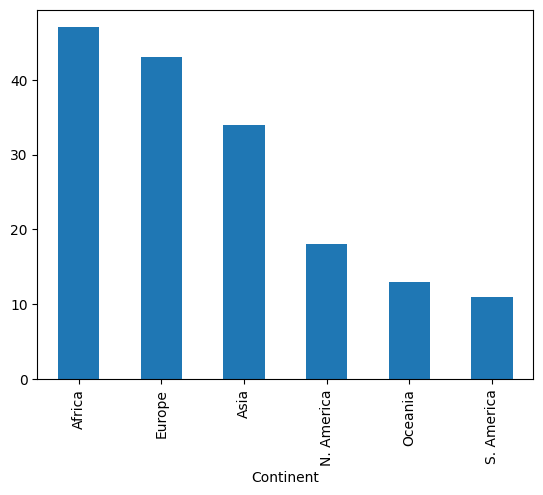

In [2]:
#| fig-alt: A bar plot with each continent on the x-axis. The heights of the bars correspond to the value count for each continent. Africa has the tallest bar and S. America has the shortest.
wb['Continent'].value_counts().plot(kind='bar');

Recall that `.value_counts()` returns a `Series` with the total count of each unique value. We call `.plot(kind='bar')` on this result to visualize these counts as a bar plot.

Plotting methods in `pandas` are the least preferred and not supported in Data 100, as their functionality is limited. Instead, future examples will focus on other libraries built specifically for visualizing data. The most well-known library here is `matplotlib`.

### Plotting in Matplotlib

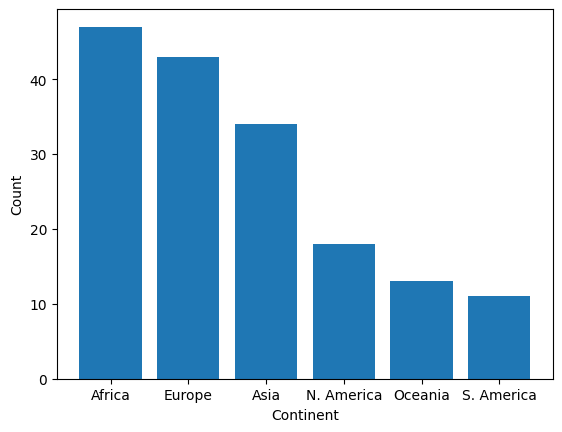

In [3]:
#| fig-alt: A bar plot with each continent on the x-axis and count on the y-axis. The heights of the bars correspond to the value count for each continent. Africa has the tallest bar and S. America has the shortest.
import matplotlib.pyplot as plt # matplotlib is typically given the alias plt

continent = wb['Continent'].value_counts()
plt.bar(continent.index, continent)
plt.xlabel('Continent')
plt.ylabel('Count');

While more code is required to achieve the same result, `matplotlib` is often used over `pandas` for its ability to plot more complex visualizations, some of which are discussed shortly.

However, note how we needed to label the axes with `plt.xlabel` and `plt.ylabel`, as `matplotlib` does not support automatic axis labeling. To get around these inconveniences, we can use a more efficient plotting library: `seaborn`.

### Plotting in `Seaborn`

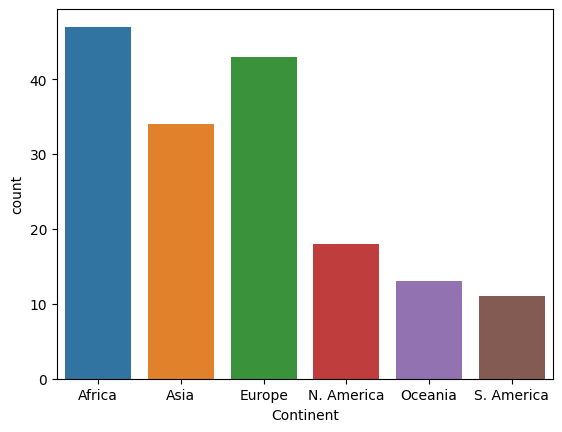

In [4]:
#| fig-alt: A bar plot with each continent on the x-axis and count on the y-axis. The heights of the bars correspond to the value count for each continent. Africa has the tallest bar and S. America has the shortest.
import seaborn as sns # seaborn is typically given the alias sns
sns.countplot(data = wb, x = 'Continent', hue='Continent');

In contrast to `matplotlib`, the general structure of a `seaborn` call involves passing in an entire `DataFrame`, and then specifying what column(s) to plot. `seaborn.countplot` both counts and visualizes the number of unique values in a given column. This column is specified by the `x` argument to `sns.countplot`, while the `DataFrame` is specified by the `data` argument. 

> `seaborn` is built on `matplotlib`! When using `seaborn`, you’re actually using `matplotlib` under the hood, but with an easier-to-use interface for working with `DataFrame`s and creating certain types of plots.

For the vast majority of visualizations, `seaborn` is far more concise and aesthetically pleasing than `matplotlib`. However, the color scheme of this particular bar plot is arbitrary - it encodes no additional information about the categories themselves. This is not always true; color may signify meaningful detail in other visualizations. We'll explore this more in-depth during the next lecture.

By now, you'll have noticed that each of these plotting libraries have a very different syntax. As with `pandas`, we'll teach you the important methods in `matplotlib` and `seaborn`, but you'll learn more through documentation.

1. [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
2. [Seaborn Documentation](https://seaborn.pydata.org/)

## Distributions of Quantitative Variables

Revisiting our example with the `wb` DataFrame, let's plot the distribution of `Gross national income per capita`.

````{dropdown} Click to see the code
:open: false
```python
wb.head(5)
```
````

In [5]:
wb.head(5)

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


How should we define our categories for this variable? In the previous example, these were a few unique values of the `Continent` column. If we use similar logic here, our categories are the different numerical values contained in the `Gross national income per capita` column.

Under this assumption, let's plot this distribution using the `seaborn.countplot` function.

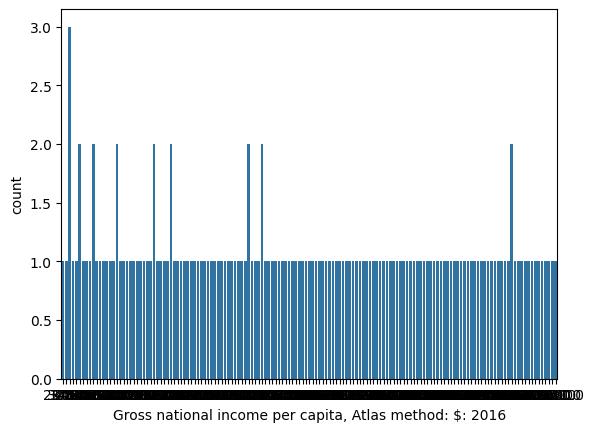

In [6]:
#| fig-alt: "Countplot is used to create a plot with Gross national income per capita, Atlas method: $: 2016 on the x-axis and count on the y. Most data has a count of 1, some have a count of 2, and one has a count of 3."
sns.countplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016');

What happened? A bar plot (either `plt.bar` or `sns.countplot`) will create a separate bar for each unique value of a variable. With a quantitative variable, we may not have a finite number of possible values, which can lead to situations like above where we would need many, many bars to display each unique value.

Specifically, we can say this histogram suffers from **overplotting** as we are unable to interpret the plot and gain any meaningful insight. 

Rather than bar plots, to visualize the distribution of a quantitative variable, we use one of the following types of plots:

- Histogram
- Box plot
- Violin plot

### Histograms

You are likely familiar with histograms from Data 8. A histogram collects quantitative data into bins, then plots this binned data. \
\
Each bin reflects the density of datapoints with values that lie between the left and right ends of the bin; in other words, the **area**  (not height!) of each bin is proportional to the **percentage** of datapoints it contains. 

#### Plotting Histograms
Below, we plot a histogram using matplotlib and seaborn. Which graph do you prefer? 

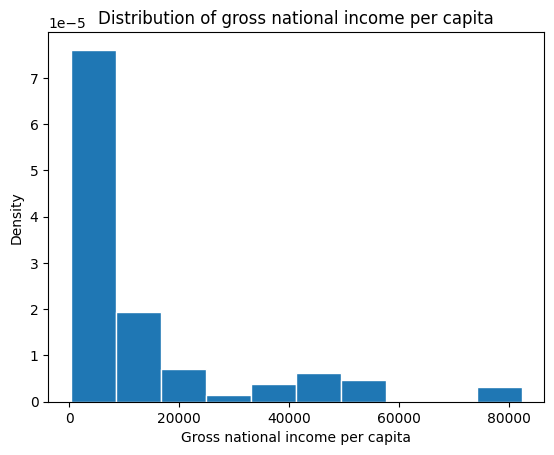

In [7]:
#| fig-alt: Histogram plotted using matplotlib. The bars are solid blue and the density value labels on the y-axis are integers 0 to 7 with the annotation 1e-5.
# The `edgecolor` argument controls the color of the bin edges
gni = wb["Gross national income per capita, Atlas method: $: 2016"]
plt.hist(gni, density=True, edgecolor="white")

# Add labels
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("Distribution of gross national income per capita");

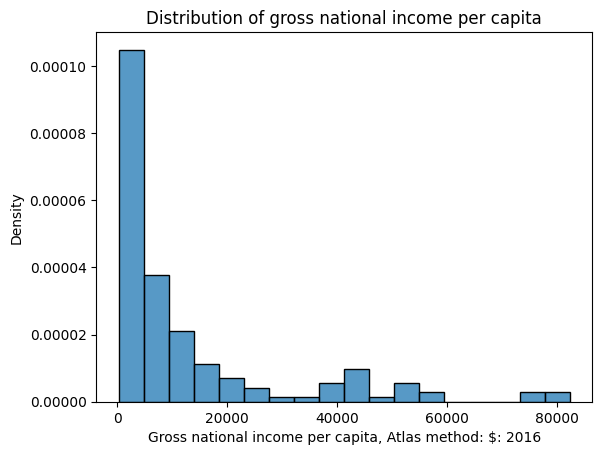

In [8]:
#| fig-alt: Histogram plotted using seaborn. The bars are a lighter blue with black outlines. The density value labels on the y-axis are decimal points with leading zeroes.
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", stat="density")
plt.title("Distribution of gross national income per capita");

#### Overlaid Histograms

We can overlay histograms (or density curves) to compare **quantitative** distributions across **qualitative** categories.

The `hue` parameter of `sns.histplot` specifies the column that should be used to determine the color of each category. `hue` can be used in many `seaborn` plotting functions.

Notice that the resulting plot includes a legend describing which color corresponds to each hemisphere – a legend should always be included if color is used to encode information in a visualization!

In [9]:
# Create a new variable to store the hemisphere in which each country is located
north = ["Asia", "Europe", "N. America"]
south = ["Africa", "Oceania", "S. America"]
wb.loc[wb["Continent"].isin(north), "Hemisphere"] = "Northern"
wb.loc[wb["Continent"].isin(south), "Hemisphere"] = "Southern"

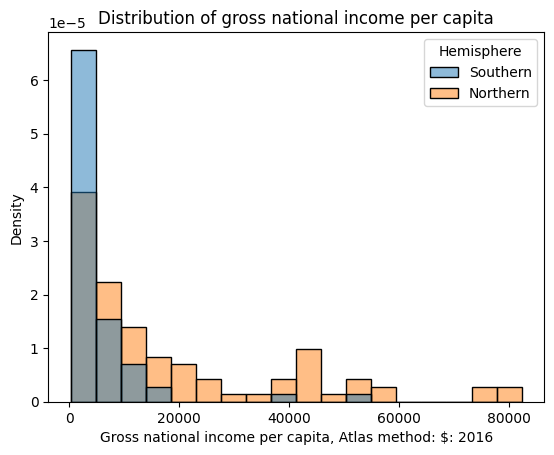

In [10]:
#| fig-alt: Overlaid histograms with the south hemisphere in blue and the north hemisphere in orange. Easy comparisons can be made within the same bin for each hemisphere.
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", hue="Hemisphere", stat="density")
plt.title("Distribution of gross national income per capita");

Again, each bin of a histogram is scaled such that its **area** is proportional to the **percentage** of all datapoints that it contains.

First bin has width 16410.0 and height 4.7741589911386953e-05
This corresponds to 16410.0 * 4.7741589911386953e-05 = 78.343949044586% of the data


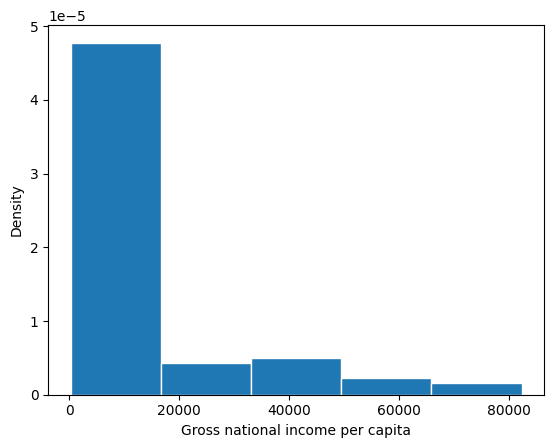

In [11]:
#| fig-alt: Histogram of gross national income per capita. 
densities, bins, _ = plt.hist(gni, density=True, edgecolor="white", bins=5)
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")

print(f"First bin has width {bins[1]-bins[0]} and height {densities[0]}")
print(f"This corresponds to {bins[1]-bins[0]} * {densities[0]} = {(bins[1]-bins[0])*densities[0]*100}% of the data")

#### Interpreting Histograms

Histograms allow us to assess a distribution by their shape. There are a few properties of histograms we can analyze:

1. Skewness and Tails
    - Skewed left (negative skew) vs skewed right (positive skew)
    - Left tail vs right tail
2. Modes
    - Most commonly occurring data
3. Outliers
    -  Using quartiles/percentiles

##### Skewness and Tails

The skew of a histogram describes the direction in which its "tail" extends.

- A distribution with a long right tail is **skewed right**, or has **positive skew** (such as `Gross national income per capita`). In a right-skewed distribution, the few large outliers "pull" the **mean** to the **right** of the **median**.
- A good way to remember this is that it looks like a "**P**" on its side for **P**ositive skew! 

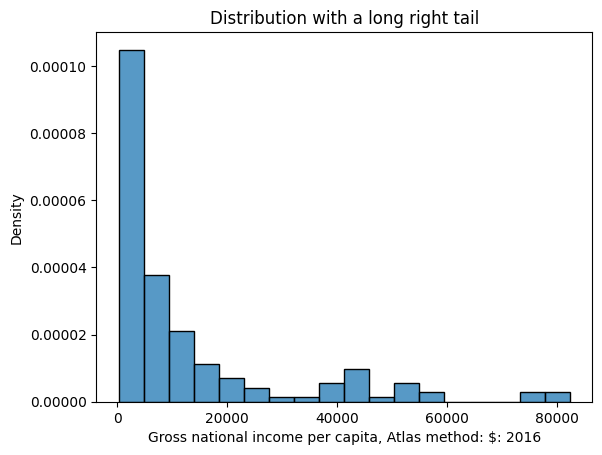

In [12]:
#| fig-alt: Distribution with a long right tail. The highest bars are on the very left of the graph and as you progress to the right side of the graph, the bars stay short.
sns.histplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016', stat = 'density');
plt.title('Distribution with a long right tail');

- A distribution with a long left tail is **skewed left**  (has **negative skew**) (such as `Access to an improved water source`). In a left-skewed distribution, the few small outliers "pull" the **mean** to the **left** of the **median**. 

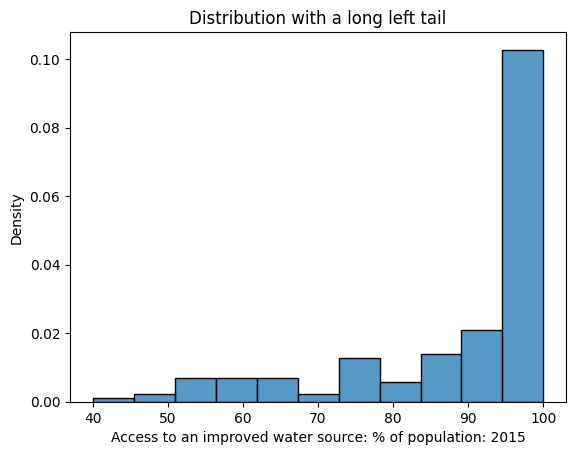

In [13]:
#| fig-alt: Distribution with a long right tail. The highest bars are on the very right of the graph and as you progress to the left side of the graph, the bars are short.
sns.histplot(data = wb, x = 'Access to an improved water source: % of population: 2015', stat = 'density');
plt.title('Distribution with a long left tail');

In the case where a distribution has equal-sized right and left tails, it is **symmetric**. The mean is approximately **equal** to the median. Think of mean as the balancing point of the distribution.

##### Modes

The **mode** is the **mo**st frequent value in a distribution. In Data 100, we describe a "mode" of a histogram as a peak in the distribution. As there may be multiple "peaks" in a distribution, we can talk about multiple modes. Often, however, it is difficult to determine what counts as its own "peak." For example, the number of peaks in the distribution of HIV rates across different countries varies depending on the number of histogram bins we plot.

If we set the number of bins to 5, the distribution appears **unimodal** (has one clear peak/mode).

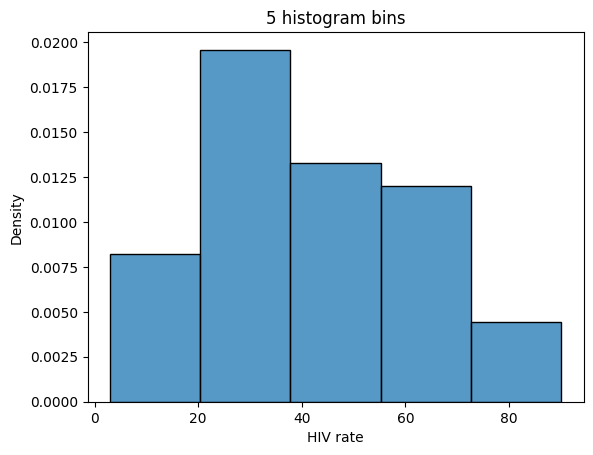

In [14]:
#| fig-alt:  Histogram with five bins.
# Rename the very long column name for convenience
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate"})
# With 5 bins, it seems that there is only one peak
sns.histplot(data=wb, x="HIV rate", stat="density", bins=5)
plt.title("5 histogram bins");

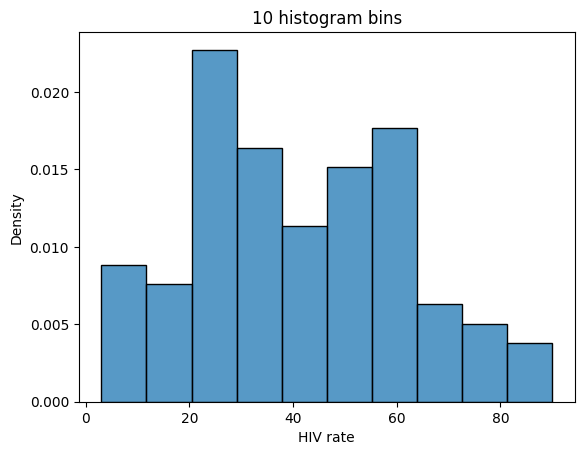

In [15]:
#| fig-alt: The same data is plotted again in a histogram, this time with ten bins. Here you can see there seems to be two peaks. 
# With 10 bins, there seem to be two peaks

sns.histplot(data=wb, x="HIV rate", stat="density", bins=10)
plt.title("10 histogram bins");

If a distribution has two peaks/modes, it is called **bimodal**. If a distribution has more peaks than that, we say it is **multimodal**.

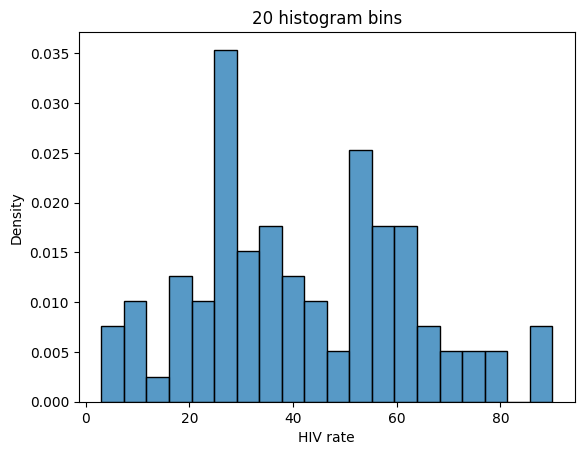

In [16]:
#| fig-alt: The same data is plotted again in a histogram, this time with twenty bins. Here it becomes hard to say what counts as a "peak"!
# And with 20 bins, it becomes hard to say what counts as a "peak"!

sns.histplot(data=wb, x ="HIV rate", stat="density", bins=20)
plt.title("20 histogram bins");

In part, it is these ambiguities that motivate us to consider using Kernel Density Estimation (KDE), which we will explore more later in this note.

##### Outliers

In a loose sense, an **outlier** is a data point that lies an abnormally large distance away from other values. However, in order to make this more concrete, we define outliers using quartiles.

###### Quartiles
Quartiles are a way of dividing data points into four quarters of roughly equal size. Each of the four quartiles is defined by its percentile.

For a quantitative variable:

- The **1st quartile** (**Q1**) is the 25th percentile of the distribution; 25% of the data is smaller than or equal to Q1.
- The **2nd quartile** (**Q2**) is the 50th percentile of the distribution, or equivalently the **median** of the distribution. 50% of the data is smaller than or equal to Q2.
- The **3rd quartile** (**Q3**) is the 75th percentile of the distribution; 75% of the data is smaller than or equal to Q3.

The interval **[Q1, Q3]** contains the "middle 50% of the data."

This concept is illustrated in the histogram below, where the three quartiles are marked with red vertical bars.

````{dropdown} Click to see the code
:open: false
```python
#| fig-alt: A Histogram is overlaid with a rug plot. The histogram consists of two colors of bars. The middle 50% is in blue and has the tallest bars in the center of the distribution. The other bars are in orange and they are shorter and on either side of the center blue bars. The rug plot marks the 25th, 50th, and 75th percentiles which align with the start, middle, and end of the blue bars respectively.
#| code-fold: true
gdp = wb['Gross domestic product: % growth : 2016']
gdp = gdp[~gdp.isna()]

q1, q2, q3 = np.percentile(gdp, [25, 50, 75])

wb_quartiles = wb.copy()
wb_quartiles['category'] = None
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] < q1) | (wb_quartiles['Gross domestic product: % growth : 2016'] > q3), 'category'] = 'Outside of the middle 50%'
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] > q1) & (wb_quartiles['Gross domestic product: % growth : 2016'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(wb_quartiles, x="Gross domestic product: % growth : 2016", hue="category")
sns.rugplot([q1, q2, q3], c="firebrick", lw=6, height=0.1);
```
````

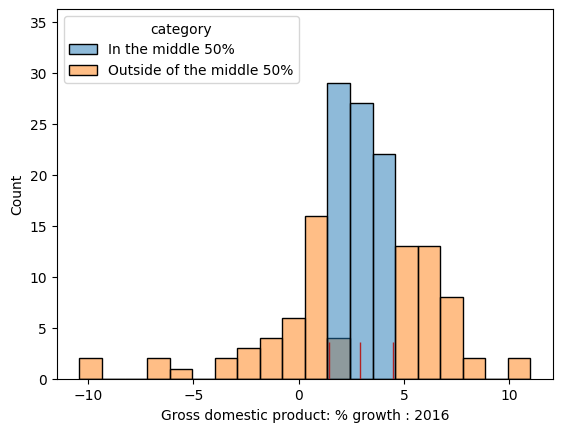

In [17]:
#| fig-alt: A Histogram is overlaid with a rug plot. The histogram consists of two colors of bars. The middle 50% is in blue and has the tallest bars in the center of the distribution. The other bars are in orange and they are shorter and on either side of the center blue bars. The rug plot marks the 25th, 50th, and 75th percentiles which align with the start, middle, and end of the blue bars respectively.
gdp = wb['Gross domestic product: % growth : 2016']
gdp = gdp[~gdp.isna()]

q1, q2, q3 = np.percentile(gdp, [25, 50, 75])

wb_quartiles = wb.copy()
wb_quartiles['category'] = None
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] < q1) | (wb_quartiles['Gross domestic product: % growth : 2016'] > q3), 'category'] = 'Outside of the middle 50%'
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] > q1) & (wb_quartiles['Gross domestic product: % growth : 2016'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(wb_quartiles, x="Gross domestic product: % growth : 2016", hue="category")
sns.rugplot([q1, q2, q3], c="firebrick", lw=6, height=0.1);

The **Interquartile range (IQR)** is a measure of spread of a distribution. You can calculate the IQR of a distribution with the formula below.

- IQR = Q3 - Q1

We define **outliers** by the following formula:

- Values > Q3 $+$ ($1.5\times$ IQR)
- Values < Q1 $-$ ($1.5\times$ IQR)

### Box Plots

Box plots display the distribution of a variable using information about **quartiles**.

In a box plot, the lower extent of the box lies at Q1, while the upper extent of the box lies at Q3. The horizontal line in the middle of the box corresponds to Q2 (equivalently, the median). This can be seen in the box plot below.

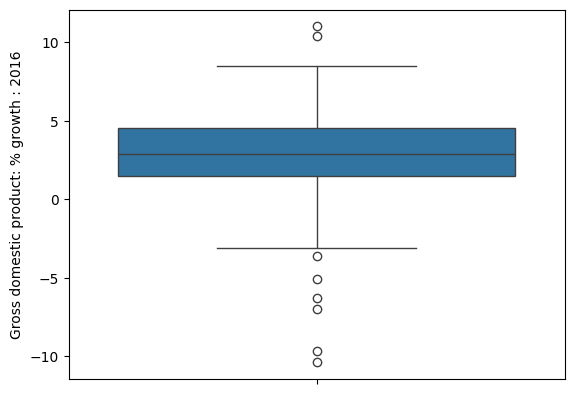

In [18]:
#| fig-alt: Example box plot.
sns.boxplot(data=wb, y='Gross domestic product: % growth : 2016');

The **whiskers** of a box-plot are the two points that lie at the \[$1^{st}$ Quartile $-$ ($1.5\times$ IQR)\], and the \[$3^{rd}$ Quartile $+$ ($1.5\times$ IQR)\]. They are the lower and upper ranges of "normal" data (the points excluding outliers). 

The different forms of information contained in a box plot can be summarized as follows:

```{image} images/box_plot_diagram_updated_2.png
:alt: An annotated box plot showing outliers, whiskers, and quartiles.
:width: 600
```

### Side-by-Side Box plots

Plotting side-by-side box plots allows us to compare distributions across different categories. In other words, they enable us to plot both a qualitative variable and a quantitative variable in one visualization.

With `seaborn`, we can easily create side-by-side plots by specifying both an x and y column.

In the example below, we plot the distribution of a quantitative variable, GDP % growth, across different categories, which are different continents in this case

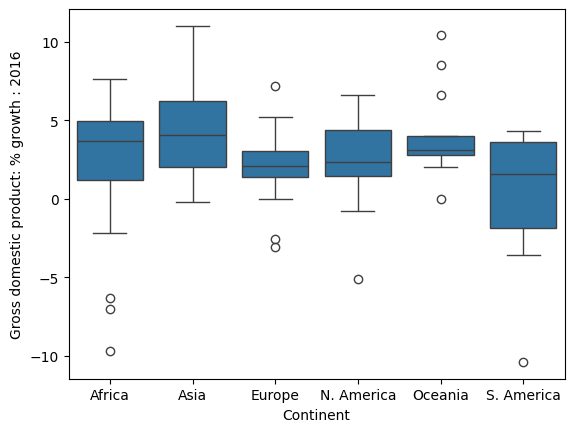

In [19]:
#| fig-alt: Example of side-by-side box plots. On the x-axis is the Continent with separate box plots per continent. Each continent box plot shares the same y-axis leading to easy comparison. 
sns.boxplot(data=wb, x="Continent", y='Gross domestic product: % growth : 2016');

### Violin Plots

Violin plots are just box plots with smoothed density curves. The width indicates the density of points. Q1, the median, Q3, and whiskers are still present, just harder to see at first. 

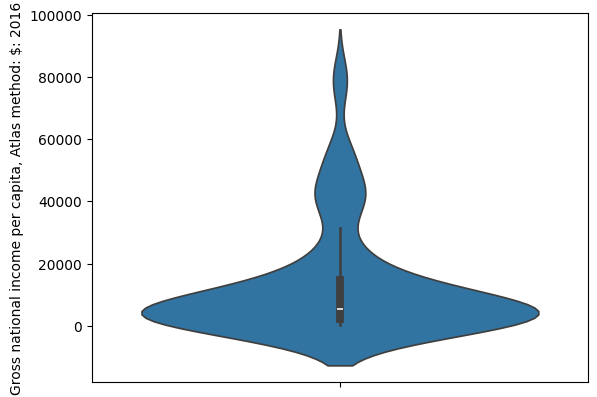

In [20]:
#| fig-alt: Example violin plot.
sns.violinplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016");

Look closely at the center vertical bar of the violin plot above; the three quartiles and "whiskers" are still present!

:::{note} Can violin plots or box plots display modality?
  
Violin plots **can** display modality, and box plots **cannot**! The distribution in the violin plot above is (arguably) multimodal. We see one peak/mode around the median, and two others at higher values.You cannot tell this from a box plot of the same information alone (We plotted this same distribution as a box plot earlier in these notes).

```{image} images/box_vs_violin_width.png
:alt: The same data is plotted twice, on the left with a box plot and on the right with a violin plot.
:width: 600
```

Observe that the width of a box in a box plot has no meaning, but the width in a violin plot is meaningful, and gives us information about the density of data points at a given range of values!

Since a violin plot contains all the information that a box plot does, as well as information about modality/density of points, you may wonder why we still use box plots. The choice between a box plot and a violin plot will depend on if the density of points is useful information about the distribution you're trying to visualize. If the density of points is not useful information, it can distract from information you are trying to highlight about the distribution.
  
:::

## Kernel Density Estimation
Often, we want to identify general trends across a distribution, rather than focus on detail. Smoothing a distribution helps generalize the structure of the data and eliminate noise.

### KDE Theory

A **kernel density estimate (KDE)** is a smooth, continuous function that approximates a curve. It allows us to represent general trends in a distribution without focusing on the details, which is useful for analyzing the broad structure of a dataset. 

More formally, a KDE attempts to approximate the underlying **probability distribution** from which our dataset was drawn. You may have encountered the idea of a probability distribution in your other classes; if not, we'll discuss it at length in the next lecture. For now, you can think of a probability distribution as a description of how likely it is for us to sample a particular value in our dataset. 

A KDE curve estimates the probability density function of a random variable. Consider the example below, where we have used `sns.displot` to plot both a histogram (containing the data points we actually collected) and a KDE curve (representing the *approximated* probability distribution from which this data was drawn) using data from the World Bank dataset (`wb`).

````{dropdown} Click to see the code
:open: false
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore", "use_inf_as_na") # Supresses distracting deprecation warnings

wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate",
                       'Gross national income per capita, Atlas method: $: 2016':'gni'})
wb.head()
```
````

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore", "use_inf_as_na") # Supresses distracting deprecation warnings

wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate",
                       'Gross national income per capita, Atlas method: $: 2016':'gni'})
wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


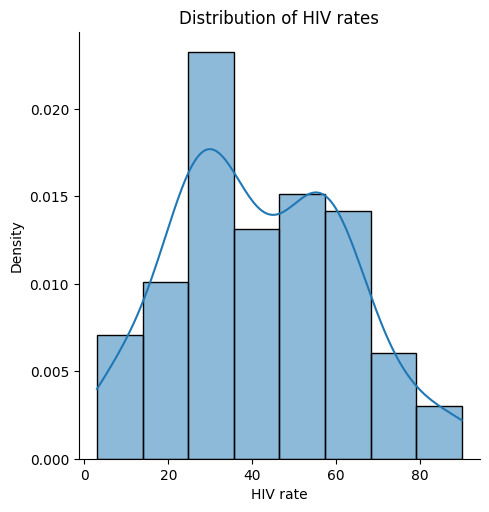

In [22]:
#| fig-alt: "Plot titled 'Distribution of HIV rates' with both the histogram and KDE plotted"
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data = wb, x = 'HIV rate', \
                       kde = True, stat = "density")

plt.title("Distribution of HIV rates");

Notice that the smooth KDE curve is higher when the histogram bins are taller. You can think of the height of the KDE curve as representing how "probable" it is that we randomly sample a datapoint with the corresponding value. This intuitively makes sense – if we have already collected more datapoints with a particular value (resulting in a tall histogram bin), it is more likely that, if we randomly sample another datapoint, we will sample one with a similar value (resulting in a high KDE curve).

```{image} images/example_dataset_with_increasing_sample_size.png
:alt: Stacked histograms of the same dataset with increasing sample sizes (10 to 50,000), showing that larger samples produce a smoother and more clearly bimodal distribution.
:width: 600
```

The visualization above can also provide another way to understand KDE. With very few samples (N=10), the histogram looks irregular and does not clearly reveal the underlying distribution. As the sample size increases (N=100, N=500, N=50,000), the overall shape becomes more stable and smoother, making the true distribution easier to see. KDE aims to capture this underlying shape even when we do not have a very large sample.

The area under a probability density function should always integrate to 1, representing the fact that the total probability of a distribution should always sum to 100%. Hence, a KDE curve will always have an area under the curve of 1.

### Constructing a KDE

We perform kernel density estimation using three steps.

1. Place a kernel at each datapoint.
2. Normalize the kernels to have a total area of 1 (across all kernels).
3. Sum the normalized kernels.

We'll explain what a "kernel" is momentarily.

To make things simpler, let's construct a KDE for a small, artificially generated dataset of 5 datapoints: $[2.2, 2.8, 3.7, 5.3, 5.7]$. In the plot below, each vertical bar represents one data point.

````{dropdown} Click to see the code
:open: false
```python
#| fig-alt: Rug plot of the five datapoints in our artifically generated dataset. The points are between 2 and 6.
data = [2.2, 2.8, 3.7, 5.3, 5.7]

sns.rugplot(data, height=0.3)

plt.xlabel("Data")
plt.ylabel("Density")
plt.xlim(-3, 10)
plt.ylim(0, 0.5);
```
````

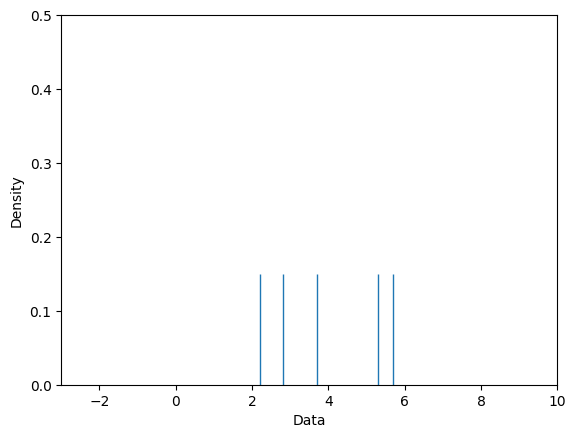

In [23]:
#| fig-alt: Rug plot of the five datapoints in our artifically generated dataset. The points are between 2 and 6.
data = [2.2, 2.8, 3.7, 5.3, 5.7]

sns.rugplot(data, height=0.3)

plt.xlabel("Data")
plt.ylabel("Density")
plt.xlim(-3, 10)
plt.ylim(0, 0.5);

Our goal is to create the following KDE curve, which was generated automatically by `sns.kdeplot`.

````{dropdown} Click to see the code
:open: false
```python
#| fig-alt: Plot showing both the histogram and KDE

plt.xlabel("Data")
plt.xlim(-3, 10)
plt.ylim(0, 0.5)

sns.kdeplot(data, bw_method=0.65) 
sns.histplot(data, stat='density', bins=2);
```
````

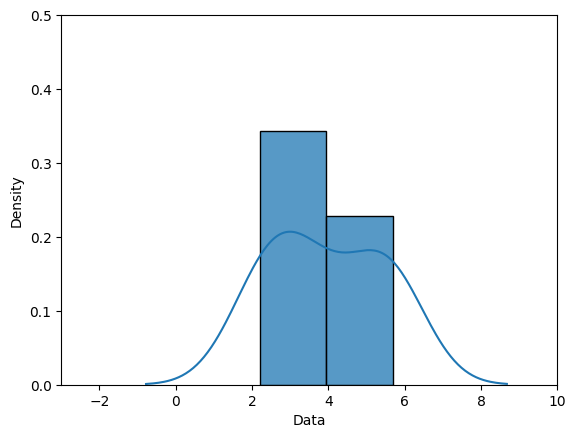

In [24]:
#| fig-alt: Plot showing both the histogram and KDE

plt.xlabel("Data")
plt.xlim(-3, 10)
plt.ylim(0, 0.5)

sns.kdeplot(data, bw_method=0.65) 
sns.histplot(data, stat='density', bins=2);

Alternatively, we can use `sns.histplot`. You can also get a very similar result in a single call by requesting the KDE be added to the histogram, with `kde=True` and some extra keywords:

````{dropdown} Click to see the code
:open: false
```python
#| fig-alt: The same plot with the histogram and KDE, this time created using seaborn

plt.xlabel("Data")
plt.xlim(-3, 10)
plt.ylim(0, 0.5)

sns.histplot(data, bins=2, kde=True, stat="density", kde_kws=dict(cut=3, bw_method=0.65));
```
````

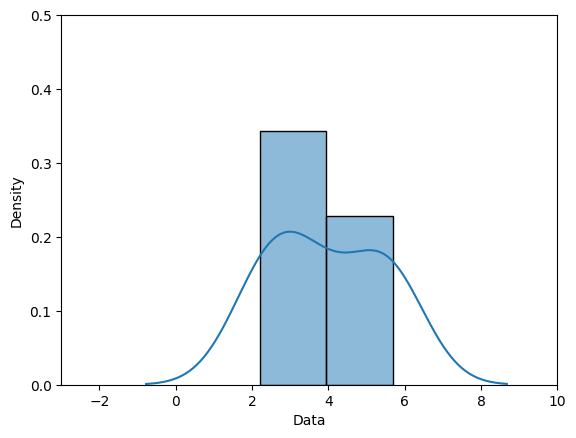

In [25]:
#| fig-alt: The same plot with the histogram and KDE, this time created using seaborn

plt.xlabel("Data")
plt.xlim(-3, 10)
plt.ylim(0, 0.5)

sns.histplot(data, bins=2, kde=True, stat="density", kde_kws=dict(cut=3, bw_method=0.65));

#### Step 1: Place a Kernel at Each Data Point

To begin generating a density curve, we need to choose a **kernel** and **bandwidth value ($\alpha$)**. What are these exactly? 

A **kernel** is a type of density curve. It is the mathematical function that attempts to capture the randomness of each data point in our sampled data. To explain what this means, consider just *one* of the datapoints in our dataset: $2.2$. We obtained this datapoint by randomly sampling some information out in the real world (you can imagine $2.2$ as representing a single measurement taken in an experiment, for example). If we were to sample a new datapoint, we may obtain a slightly different value. It could be higher than $2.2$; it could also be lower than $2.2$. We make the assumption that any future sampled datapoints will likely be similar in value to the data we've already drawn. This means that our *kernel* – our description of the probability of randomly sampling any new value – will be greatest at the datapoint we've already drawn but still have non-zero probability above and below it. The area under any kernel should integrate to 1, representing the total probability of drawing a new datapoint.

A **bandwidth value**, usually denoted by $\alpha$, represents the width of the kernel. A large value of $\alpha$ will result in a wide, short kernel function, while a small value with result in a narrow, tall kernel.

Below, we place a **Gaussian kernel**, plotted in orange, over the datapoint $2.2$. A Gaussian kernel is simply the normal distribution, which you may have called a bell curve in Data 8.

````{dropdown} Click to see the code
:open: false
```python
#| fig-alt: "A Gaussian kernel is plotted over one of the datapoints in the artificially generated dataset."

def gaussian_kernel(x, z, a):
    # We'll discuss where this mathematical formulation came from later
    return (1/np.sqrt(2*np.pi*a**2)) * np.exp((-(x - z)**2 / (2 * a**2)))

# Plot our datapoint
sns.rugplot([2.2], height=0.3)

# Plot the kernel
x = np.linspace(-3, 10, 1000)
plt.plot(x, gaussian_kernel(x, 2.2, 1))

plt.xlabel("Data")
plt.ylabel("Density")
plt.xlim(-3, 10)
plt.ylim(0, 0.5);
```
````

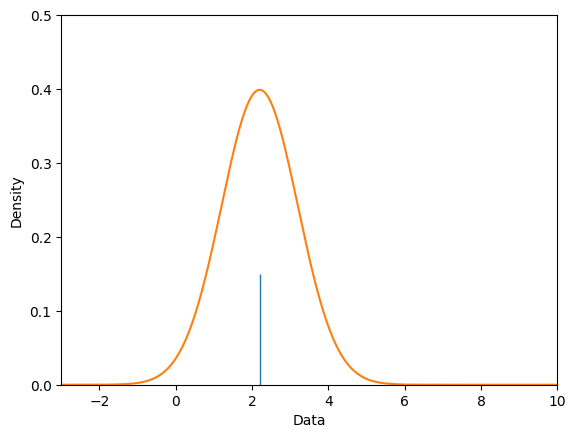

In [26]:
#| fig-alt: "A Gaussian kernel is plotted over one of the datapoints in the artificially generated dataset."

def gaussian_kernel(x, z, a):
    # We'll discuss where this mathematical formulation came from later
    return (1/np.sqrt(2*np.pi*a**2)) * np.exp((-(x - z)**2 / (2 * a**2)))

# Plot our datapoint
sns.rugplot([2.2], height=0.3)

# Plot the kernel
x = np.linspace(-3, 10, 1000)
plt.plot(x, gaussian_kernel(x, 2.2, 1))

plt.xlabel("Data")
plt.ylabel("Density")
plt.xlim(-3, 10)
plt.ylim(0, 0.5);

To begin creating our KDE, we place a kernel on *each* datapoint in our dataset. For our dataset of 5 points, we will have 5 kernels.

````{dropdown} Click to see the code
:open: false
```python
#| fig-alt: "A Gaussian kernel is plotted over all of the datapoints in the artificially generated dataset."

# You will work with the functions below in Lab 4
def create_kde(kernel, pts, a):
    # Takes in a kernel, set of points, and alpha
    # Returns the KDE as a function
    def f(x):
        output = 0
        for pt in pts:
            output += kernel(x, pt, a)
        return output / len(pts) # Normalization factor
    return f

def plot_kde(kernel, pts, a):
    # Calls create_kde and plots the corresponding KDE
    f = create_kde(kernel, pts, a)
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    y = [f(xi) for xi in x]
    plt.plot(x, y);
    
def plot_separate_kernels(kernel, pts, a, norm=False):
    # Plots individual kernels, which are then summed to create the KDE
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    for pt in pts:
        y = kernel(x, pt, a)
        if norm:
            y /= len(pts)
        plt.plot(x, y)
    
    plt.show();
    
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.xlabel("Data")
plt.ylabel("Density")

plot_separate_kernels(gaussian_kernel, data, a = 1)
```
````

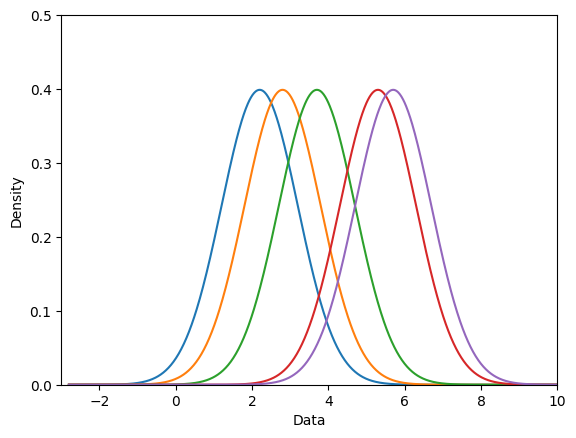

In [27]:
#| fig-alt: "A Gaussian kernel is plotted over all of the datapoints in the artificially generated dataset."

# You will work with the functions below in Lab 4
def create_kde(kernel, pts, a):
    # Takes in a kernel, set of points, and alpha
    # Returns the KDE as a function
    def f(x):
        output = 0
        for pt in pts:
            output += kernel(x, pt, a)
        return output / len(pts) # Normalization factor
    return f

def plot_kde(kernel, pts, a):
    # Calls create_kde and plots the corresponding KDE
    f = create_kde(kernel, pts, a)
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    y = [f(xi) for xi in x]
    plt.plot(x, y);
    
def plot_separate_kernels(kernel, pts, a, norm=False):
    # Plots individual kernels, which are then summed to create the KDE
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    for pt in pts:
        y = kernel(x, pt, a)
        if norm:
            y /= len(pts)
        plt.plot(x, y)
    
    plt.show();
    
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.xlabel("Data")
plt.ylabel("Density")

plot_separate_kernels(gaussian_kernel, data, a = 1)

#### Step 2: Normalize Kernels to Have a Total Area of 1

Above, we said that *each* kernel has an area of 1. Earlier, we also said that our goal is to construct a KDE curve using these kernels with a *total* area of 1. If we were to directly sum the kernels as they are, we would produce a KDE curve with an integrated area of (5 kernels) $\times$ (area of 1 each) = 5. To avoid this, we will **normalize** each of our kernels. This involves multiplying each kernel by $\frac{1}{\#\:\text{datapoints}}$. 

In the cell below, we multiply each of our 5 kernels by $\frac{1}{5}$ to apply normalization.

````{dropdown} Click to see the code
:open: false
```python
#| fig-alt: "A Gaussian kernel is plotted over all of the datapoints in the artificially generated dataset. The kernels have been normalized, so they are more stout than in the previous plot"
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.xlabel("Data")
plt.ylabel("Density")

# The `norm` argument specifies whether or not to normalize the kernels
plot_separate_kernels(gaussian_kernel, data, a = 1, norm = True)
```
````

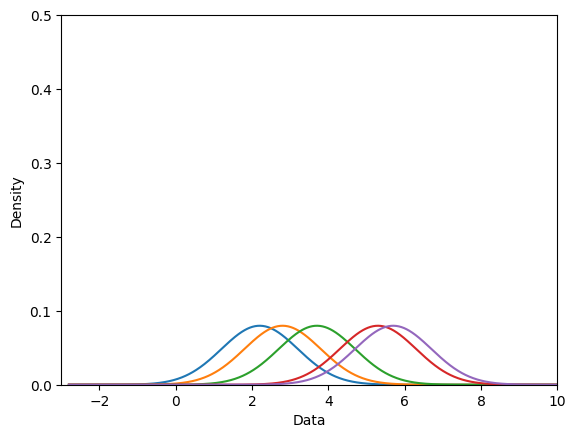

In [28]:
#| fig-alt: "A Gaussian kernel is plotted over all of the datapoints in the artificially generated dataset. The kernels have been normalized, so they are more stout than in the previous plot"
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.xlabel("Data")
plt.ylabel("Density")

# The `norm` argument specifies whether or not to normalize the kernels
plot_separate_kernels(gaussian_kernel, data, a = 1, norm = True)

#### Step 3: Sum the Normalized Kernels

Our KDE curve is the sum of the normalized kernels. Notice that the final curve is identical to the plot generated by `sns.kdeplot` we saw earlier!

````{dropdown} Click to see the code
:open: false
```python
#| fig-alt: The KDE plotted.
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.xlabel("Data")
plt.ylabel("Density")

plot_kde(gaussian_kernel, data, a=1)
```
````

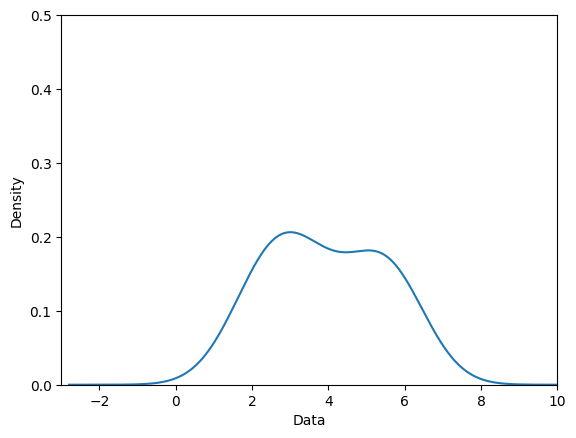

In [29]:
#| fig-alt: The KDE plotted.
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.xlabel("Data")
plt.ylabel("Density")

plot_kde(gaussian_kernel, data, a=1)

Note that it would be equivalent to sum the kernels and then normalize the result.

### Mathematical Notation of KDE

```{image} images/kde_function.png
:alt: KDE formula
:width: 345
```

A general “KDE formula” function is given above.

1. $f_{\alpha}(x)$ is the end result.$\rightarrow$ **Height** of the final KDE curve at any x-value.

2. $K_{\alpha}(x, x_i)$ is the kernel centered on the observation `i`. 
    - Each kernel individually has area 1.
    - x represents any number on the number line. It is the input to our function.
3. $n$ is the number of observed datapoints that we have.
    - We multiply by $\frac{1}{n}$ so that the total area of the KDE is still 1.
4. Each $x_i \in \{x_1, x_2, \dots, x_n\}$ represents an observed datapoint. 
    - These are what we use to create our KDE by summing multiple shifted kernels centered at these points.

* $\alpha$ (alpha) is the bandwidth or smoothing parameter. 

A **kernel** (for our purposes) is a valid density function. This means it:

- Must be non-negative for all inputs.
- Must integrate to 1.

#### Gaussian Kernel

The most common kernel is the **Gaussian kernel**. The Gaussian kernel is equivalent to the Gaussian probability density function (the Normal distribution), centered at the observed value with a standard deviation of $\alpha$ (this is known as the **bandwidth** parameter).

$$K_a(x, x_i) = \frac{1}{\sqrt{2\pi\alpha^{2}}}e^{-\frac{(x-x_i)^{2}}{2\alpha^{2}}}$$

In this formula:

* $x$ (no subscript) represents any value along the x-axis of our plot
* $x_i$ represents the $i$ -th datapoint in our dataset. It is one of the values that we have actually collected in our data sampling process. In our example earlier, $x_i=2.2$. Those of you who have taken a probability class may recognize $x_i$ as the **mean** of the normal distribution.
* Each kernel is **centered** on our observed values, so its distribution mean is $x_i$.
* $\alpha$ is the bandwidth parameter, representing the width of our kernel. More formally, $\alpha$ is the **standard deviation** of the Gaussian curve.
    * A large value of $\alpha$ will produce a kernel that is wider and shorter – this leads to a smoother KDE when the kernels are summed together.
    * A small value of $\alpha$ will produce a narrower, taller kernel, and, with it, a noisier KDE.

The details of this (admittedly intimidating) formula are less important than understanding its role in kernel density estimation – this equation gives us the shape of each kernel.

**Gaussian Kernel, $\alpha$ = 0.1:** 

```{image} images/gaussian_0.1.png
:alt: Gaussian kernel with alpha=0.1
:width: 345
```

**Gaussian Kernel, $\alpha$ = 1:**

```{image} images/gaussian_1.png
:alt: Gaussian kernel with alpha=1
:width: 345
```

**Gaussian Kernel, $\alpha$ = 2:** 
```{image} images/gaussian_2.png
:alt: Gaussian kernel with alpha=2
:width: 345
```

**Gaussian Kernel, $\alpha$ = 5:** 

```{image} images/gaussian_5.png
:alt: Gaussian kernel with alpha=5
:width: 345
```


#### Boxcar Kernel

Another example of a kernel is the **Boxcar kernel**. The boxcar kernel assigns a uniform density to points within a "window" of the observation, and a density of 0 elsewhere. The equation below is a boxcar kernel with the center at $x_i$ and the bandwidth of $\alpha$.

$$K_a(x, x_i) = \begin{cases}
        \frac{1}{\alpha}, & |x - x_i| \le \frac{\alpha}{2}\\
        0, & \text{else }
    \end{cases}$$
    
The boxcar kernel is seldom used in practice – we include it here to demonstrate that a kernel function can take whatever form you would like, provided it integrates to 1 and does not output negative values.

````{dropdown} Click to see the code
:open: false
```python
#| fig-alt: The Boxcar kernel centered at 0 with bandwidth $\alpha$ = 1.

def boxcar_kernel(alpha, x, z):
    return (((x-z)>=-alpha/2)&((x-z)<=alpha/2))/alpha

xs = np.linspace(-5, 5, 200)
alpha=1
kde_curve = [boxcar_kernel(alpha, x, 0) for x in xs]
plt.plot(xs, kde_curve);
```
````

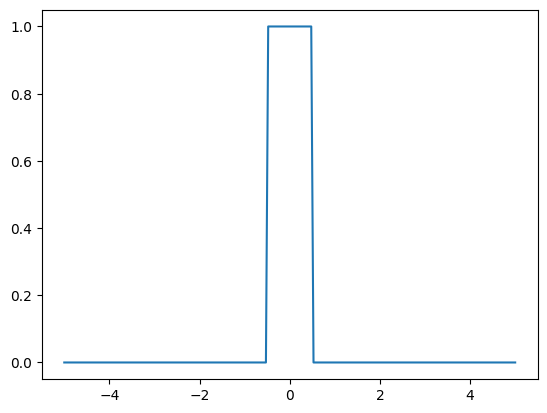

In [30]:
#| fig-alt: The Boxcar kernel centered at 0 with bandwidth $\alpha$ = 1.

def boxcar_kernel(alpha, x, z):
    return (((x-z)>=-alpha/2)&((x-z)<=alpha/2))/alpha

xs = np.linspace(-5, 5, 200)
alpha=1
kde_curve = [boxcar_kernel(alpha, x, 0) for x in xs]
plt.plot(xs, kde_curve);

The diagram on the right is how the density curve for our 5 point dataset would have looked had we used the Boxcar kernel with bandwidth $\alpha$ = 1.

**KDE:**

```{image} images/gaussian_kernel.png
:alt: KDE of toy data with Gaussian kernel and alpha=1.
:width: 350
```

**Boxcar:**

```{image} images/boxcar_kernel.png
:alt: KDE of toy data with Boxcar kernel and alpha=1.
:width: 350
```

Before we finish this section on KDE, it is important to note some of its downsides when used to visualize distributions:
- They make up information: a KDE plot can make a distribution look wider, taller, or shorter than it really is.

- They hide interesting patterns: a small peak could be an interesting pattern worth investigating, but KDE can blur it out.

- They can give a false sense of confidence: A KDE curve based on n = 10 can appear just as smooth as one based on n = 10,000, potentially hiding the fact that we have very little data.

We'll continue covering visualization in the next lecture!